In [11]:
# 사용하는 패키지
from urllib.request import urlopen 
from bs4 import BeautifulSoup


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
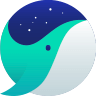
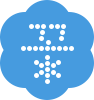

NameError: name 'pritn' is not defined

In [15]:
# html크롤링
html = urlopen("http://www.naver.com")
htmllang = BeautifulSoup(html,"html.parser")
#전부 크롤링
print(htmllang)
#특정태그 크롤링
pritn(htmllang.body.div)

In [20]:
#특정태그에서 원하는 속성값의 내용가져오기
for meta in htmllang.body.find_all("a"):
    print(meta.get("href"))

#newsstand
#themecast
#timesquare
#shopcast
#account
https://whale.naver.com/banner/details/darkmode?=main&wpid=RydDy7
https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe
/
https://help.naver.com/support/welcomePage/guide.help
https://jr.naver.com
https://happybean.naver.com
#
#
#
#
#
https://help.naver.com/support/alias/search/word/word_29.naver
https://help.naver.com/support/alias/search/word/word_29.naver
https://help.naver.com/support/service/main.help?serviceNo=605&categoryNo=1991
#
#
#
#
@5@
#
#
#
#
#
#
#
https://help.naver.com/support/alias/search/word/word_16.naver
#
https://help.naver.com/support/alias/search/word/word_16.naver
https://nid.naver.com/nidlogin.login
https://help.naver.com/support/alias/search/word/word_16.naver
#
https://help.naver.com/support/service/main.help?serviceNo=605&categoryNo=1987
https://help.naver.com/support/contents/contents.help?serviceNo=605&categoryNo=18215
#
https://m.sports.naver.com/game/CERCLOSING
https://mail.naver.co

In [9]:
#태그 전부 가져오기
for meta in htmllang.head.find_all("meta"):
    print(meta)

<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1190" name="viewport"/>
<meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:description"> <link href="https://pm.pstatic.net/dist/css/nmain.20210803.css" rel="

In [23]:
#내가 원하는 속성값의 태그 가져오기
print(htmllang.body.find_all("span",{"class":"etc"}))

[<span class="etc">
<em class="date">@date@.</em>
<!-- [AU] _del 클래스를 추가해주세요. -->
<a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>
</span>, <span class="etc lotto">
<em class="n@6@">@6@</em><em class="n@7@">@7@</em><em class="n@8@">@8@</em><em class="n@9@">@9@</em><em class="n@10@">@10@</em><em class="n@11@">@11@</em><em class="imsc_bf bonus n@12@">@12@</em>
</span>, <span class="etc"><em class="num">@6@</em>원</span>, <span class="etc">
<!-- [D] 날씨별 class
ico1 맑음(낮)
ico2 맑음(밤)
ico3 구름조금(낮)
ico4 구름조금(밤)
ico5 구름많음(낮)
ico6 구름많음(밤)
ico7 흐림
ico8 약한비
ico9 비
ico10 강한비
ico11 약한눈
ico12 눈
ico13 강한눈
ico14 진눈깨비
ico15 소나기
ico16 안개
ico17 소낙눈
ico18 번개뇌우
ico19 우박
ico20 황사
ico21 비또는눈
ico22 가끔비
ico23 가끔눈
ico24 가끔비또는눈
ico25 흐린후갬
ico26 뇌우후갬
ico27 비후갬
ico28 눈후갬
ico29 흐려져비
ico30 흐려져눈
-->
<span class="ico_weather"><i class="imsc ico ico@iconNo@">@7@</i></span>
<em class="degree">@8@<sup class="celsius">°</sup></em>
</span>, <span class="etc">바로가기</span>, 